<a href="https://colab.research.google.com/github/BJToor/sep769-deep-learning-project/blob/adam/DeepLearningProject_Group2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Deep Learning Project** - Aerial Perspective Object Detection
SEP 769 - Group 2

In [34]:
#About semantic segmentation: https://www.jeremyjordan.me/semantic-segmentation/
#TF Tutorial: https://www.tensorflow.org/tutorials/images/segmentation
#TF load and process images: https://www.tensorflow.org/tutorials/load_data/images

from google.colab import drive
import tensorflow as tf
import tensorflow_datasets as tfds
drive.mount('/content/gdrive')
import cv2
import glob
import numpy as np
import os
import fnmatch
from matplotlib import pyplot as plt

if not os.path.exists("/content/gdrive/Shareddrives/SEP_769/data/drone_data/"):
  !unzip "/content/gdrive/Shareddrives/SEP_769/drone_data.zip" -d "/content/gdrive/Shareddrives/SEP_769/data"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


#Constants

In [27]:
original_images_path = '/content/gdrive/Shareddrives/SEP_769/data/drone_data/original_images/'
original_semantic_path = '/content/gdrive/Shareddrives/SEP_769/data/drone_data/label_images_semantic/'
HEIGHT = 200
WIDTH = 300

In [29]:
# reads images from dir, resizes and returns np array
# optional file type argument ext
def images_to_array(dir, width, height, ext='.jpg'):
  data = []
  files = os.listdir(dir)
  files.sort()
  for filename in files:
    if filename.endswith(ext):
      img = cv2.imread(dir + filename)
      img = cv2.resize(img, (width, height))
      data.append(img)

  return np.array(data)

In [44]:
# displays a number of originals with their masks
def display_images(images):
  plt.figure(figsize=(15,10))
  for i in range(len(images)):
    plt.subplot(1, len(images), i + 1)
    if len(images[i].shape) == 3:
      plt.imshow(tf.keras.preprocessing.image.array_to_img(images[i]))
    else:
      plt.imshow(images[i])
  plt.show()

# Image Imports

In [30]:
images = images_to_array(original_images_path, width=WIDTH, height=HEIGHT)
print(images.shape)

(400, 200, 300, 3)


In [33]:
labels = images_to_array(original_semantic_path, width=WIDTH, height=HEIGHT, ext='png')
print(labels.shape)
labels = labels[:,:,:,1]
print(labels.shape)

(400, 200, 300, 3)
(400, 200, 300)


#Data Exploration

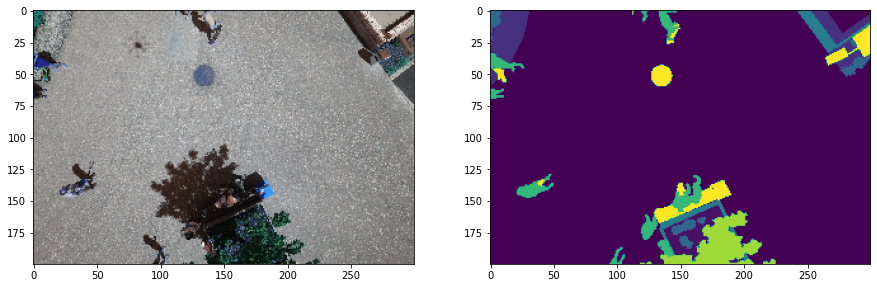

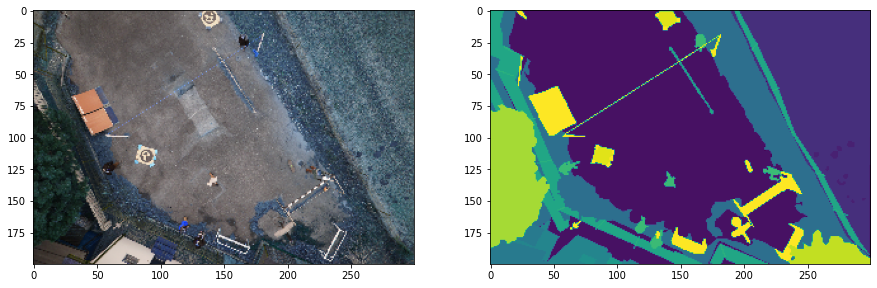

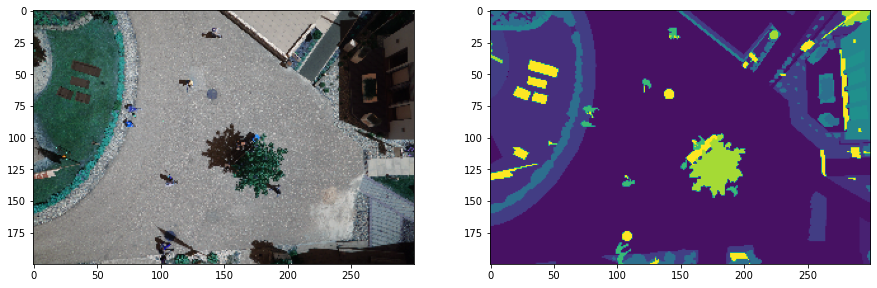

In [45]:
for i in range(3):
  display_images([images[i], labels[i]])